<a href="https://colab.research.google.com/github/Akshaya345/AIML_Tutorial/blob/main/AIML_Module1_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [77]:
from IPython.display import Latex as lt
def plotGrid(transform,unit,linestyle=':',fig=None,ax=None):
  lim1=-100
  lim2=100
  def mat2xy(start,end):
    if len(start.shape)==1:
      start=np.expand_dims(start,0)
      end=np.expand_dims(end,0)
    nan=np.ones(len(start))*np.nan
    x=np.stack((start[:,0],end[:,0], nan)).T.reshape(-1)
    y=np.stack((start[:,1],end[:,1], nan)).T.reshape(-1)
    return x,y

  def parallellines(axis,addend,lines,unit):
    addend=np.repeat(np.expand_dims(addend,0),lines*2,0)
    unit=np.expand_dims(np.arange(-lines,lines)*unit,1)
    unit=unit-lines
    addend=addend*unit
    lines=np.expand_dims(axis,0)+addend
    return np.concatenate((lines,lines*-1))
  if fig is None:
    fig,ax=plt.subplots(figsize=(10,10))
  transform=transform.astype(np.float)
  xaxis=transform[0]
  yaxis=transform[1]
  lines1=parallellines(xaxis*lim1,yaxis,100,unit)
  lines2=parallellines(xaxis*lim2,yaxis,100,unit)
  x,y=mat2xy(lines1,lines2)
  plt.plot(x,y, linestyle+'k',linewidth=0.5)
  x,y=mat2xy(xaxis*lim1, xaxis*lim2)
  plt.plot(x,y,linestyle,color='#440077')
  lines1=parallellines(yaxis*lim1,xaxis,100,unit)
  lines2=parallellines(yaxis*lim2,xaxis,100,unit)
  x,y=mat2xy(lines1, lines2)
  plt.plot(x,y,linestyle+'k',linewidth=0.5)
  x,y=mat2xy(yaxis*lim1,yaxis*lim2)
  plt.plot(x,y,linestyle,color='#aa5500')
  return fig, ax

def plotData(X, y, xlabel = 'hole', ylabel = 'bound', fig=None, ax = None):
  if fig is None:
    fig,ax=plt.subplots()
  for i in range(nclasses):
    plt.scatter(X[y==i,0],X[y==i,1])
  plt.legend([str(i) for i in range(nclasses)])
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  lim1=X.min()
  lim2=X.max()
  add=abs(lim1-lim2)/5
  return fig,ax


In [78]:
T0=np.array([[1,0],[0,1]])
T1=np.array([[1,0],[-1,2]])
data1=np.array([5,4])
data0=np.matmul(T1, data1)
print('Data in T0 = ',data0)
print('Data in T1 = ',data1)

Data in T0 =  [5 3]
Data in T1 =  [5 4]


<ipython-input-77-d709e066a4cd>:23: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  transform=transform.astype(np.float)


[]

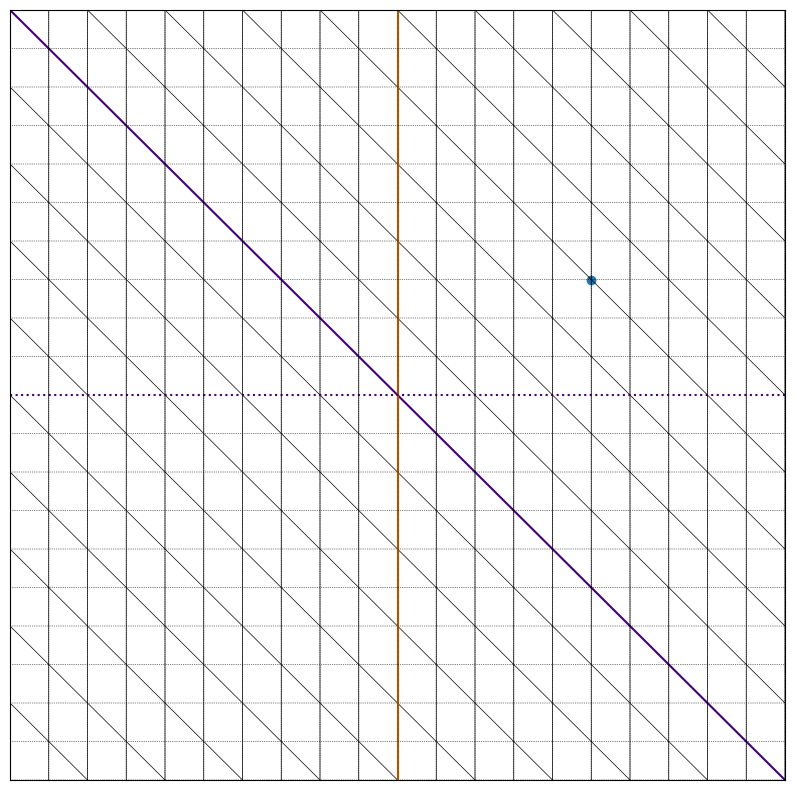

In [79]:
fig,ax=plotGrid(T1.T, 1,'-')
plotGrid(T0.T,1,fig=fig,ax=ax)
plt.scatter(data0[0], data0[1])
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xticks([])
ax.set_yticks([])

In [80]:
data0_a=np.matmul(T1,data1)
data0_b=np.matmul(data1,T1.T)
print(data0_a)
print(data0_b)

[5 3]
[5 3]


In [81]:
A1=np.array([3,3])
B1=np.array([2,-5])
C1=np.array([1,-1])

A0=np.matmul(T1, A1)
B0=np.matmul(T1, B1)
C0=np.matmul(T1, C1)

def dist(a,b):
  diff=a-b
  sq=diff*diff
  return np.sqrt(sq.sum())

print('Distance between A and B in T1 = ',dist(A1, B1))
print('Distance between B and C in T1 = ',dist(B1, C1))
print('Distance between A and C in T1 = ',dist(A1, C1))
print('')
print('Distance between A and B in T0 = ',dist(A0,B0))
print('Distance between B and C in T0 = ',dist(B0,C0))
print('Distance between A and C in T0 = ',dist(A0,C0))

Distance between A and B in T1 =  8.06225774829855
Distance between B and C in T1 =  4.123105625617661
Distance between A and C in T1 =  4.47213595499958

Distance between A and B in T0 =  15.033296378372908
Distance between B and C in T0 =  9.055385138137417
Distance between A and C in T0 =  6.324555320336759


In [82]:
def NN1(traindata, trainlabel, query):
  diff=traindata-query
  sq=diff*diff
  dist=sq.sum(1)
  label=trainlabel[np.argmin(dist)]
  return label

def NN(traindata, trainlabel, testdata):
  predlabel=np.array([NN1(traindata,trainlabel,i) for i in testdata])
  return predlabel

def Accuracy(gtlabel,predlabel):
  assert len(gtlabel)==len(predlabel),"Length of the groundtruth labels and predicted labels should be the same."
  correct=(gtlabel==predlabel).sum()
  return correct/len(gtlabel)

def cumArray(img):
  img2=img.copy()
  for i in range(1,img2.shape[1]):
    img2[i,:]=img2[i,:]+img2[i-1,:]
  img2=img2>0
  return img2

def getHolePixels(img):
  im1=cumArray(img)
  im2=np.rot90(cumArray(np.rot90(img)),3)
  im3=np.rot90(cumArray(np.rot90(img,2)),2)
  im4=np.rot90(cumArray(np.rot90(img,3)),1)
  hull=im1&im2&im3&im4
  hole=hull&~(img>0)
  return hole

def getHullPixels(img):
  im1=cumArray(img)
  im2=np.rot90(cumArray(np.rot90(img)),3)
  im3=np.rot90(cumArray(np.rot90(img,2)),2)
  im4=np.rot90(cumArray(np.rot90(img,3)),1)
  hull=im1&im2&im3&im4
  return hull

def minus(a,b):
  return a&~b

def getBoundaryPixels(img):
  img=img.copy()>0
  rshift=np.roll(img,1,1)
  lshift=np.roll(img,-1,1)
  ushift=np.roll(img,-1,0)
  dshift=np.roll(img,1,0)
  boundary=minus(img,rshift)|minus(img,lshift)|minus(img,ushift)|minus(img,dshift)
  return boundary

In [83]:
(train_X,train_Y),(test_X,test_Y)=mnist.load_data()
train_X=train_X/255
test_X=test_X/255
nclasses=4

train_X=train_X[train_Y<nclasses]
train_Y=train_Y[train_Y<nclasses]
test_X=test_X[test_Y<nclasses]
test_Y=test_Y[test_Y<nclasses]

train_X=train_X[::100].copy()
train_Y=train_Y[::100].copy()
test_X=test_X[::100].copy()
test_Y=test_Y[::100].copy()

train_hole=np.array([getHolePixels(i).sum() for i in train_X])
test_hole=np.array([getHolePixels(i).sum() for i in test_X])
train_bound=np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound=np.array([getBoundaryPixels(i).sum() for i in test_X])

train_feats=np.vstack((train_hole,train_bound)).transpose()
test_feats=np.vstack((test_hole, test_bound)).transpose()

(-100.0, 300.0)

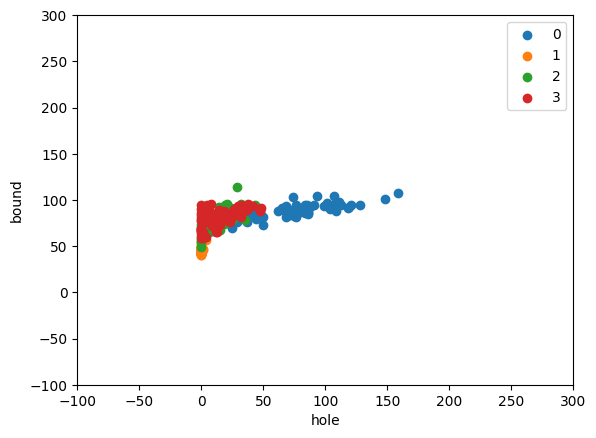

In [84]:
xlim=[-100,300]
ylim=[-100,300]
fig,ax=plotData(train_feats,train_Y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [85]:
test_pred=NN(train_feats,train_Y,test_feats)
acc=Accuracy(test_Y,test_pred)
print('Baseline accuracy = ',acc)

Baseline accuracy =  0.7619047619047619


In [86]:
transform=np.array([[0.5,-0.5],[0,2.5]])
train_feats_t=np.matmul(train_feats,transform)
test_feats_t=np.matmul(test_feats,transform)
print(transform)

[[ 0.5 -0.5]
 [ 0.   2.5]]


(-100.0, 300.0)

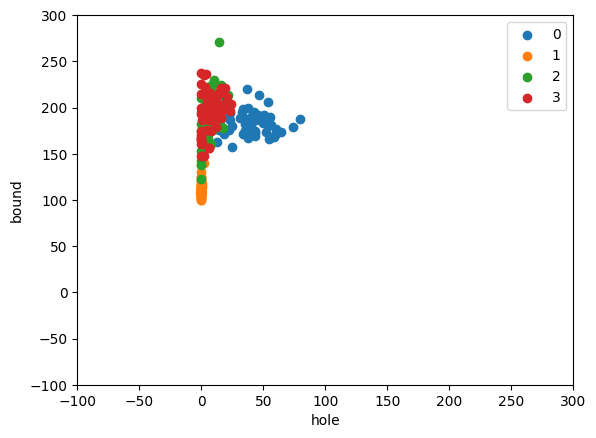

In [87]:
fig,ax=plotData(train_feats_t,train_Y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [88]:
test_pred=NN(train_feats_t,train_Y,test_feats_t)
acc=Accuracy(test_Y,test_pred)
print('Accuracy after transform = ', acc)

Accuracy after transform =  0.8095238095238095


In [143]:
transform=np.array([[-1.5,0],[2.0,3.0]])
train_feats_t=np.matmul(train_feats,transform)
test_feats_t=np.matmul(test_feats,transform)
print(transform)

[[-1.5  0. ]
 [ 2.   3. ]]


(-100.0, 300.0)

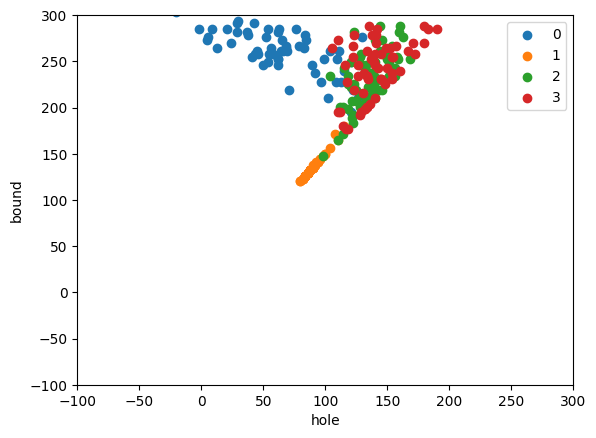

In [144]:
fig,ax=plotData(train_feats_t,train_Y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [145]:
test_pred=NN(train_feats_t,train_Y,test_feats_t)
acc=Accuracy(test_Y,test_pred)
print('Accuracy after transform = ', acc)

Accuracy after transform =  0.8095238095238095


[[2.5 0. ]
 [2.  3. ]]
Accuracy after transform =  0.7619047619047619


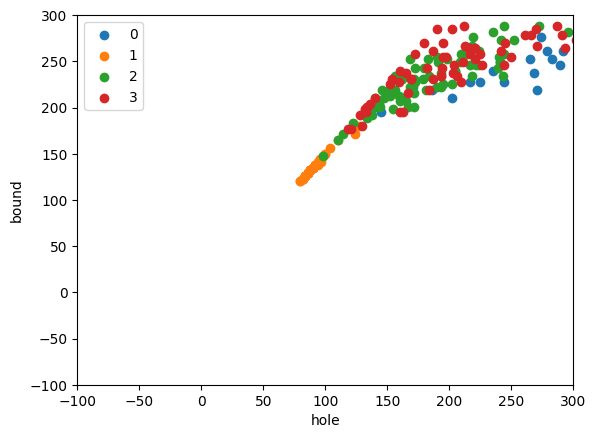

In [149]:
transform=np.array([[2.5,0],[2.0,3.0]])
train_feats_t=np.matmul(train_feats,transform)
test_feats_t=np.matmul(test_feats,transform)
print(transform)
fig,ax=plotData(train_feats_t,train_Y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
test_pred=NN(train_feats_t,train_Y,test_feats_t)
acc=Accuracy(test_Y,test_pred)
print('Accuracy after transform = ', acc)

[[1.5 0. ]
 [2.  3. ]]
Accuracy after transform =  0.8095238095238095


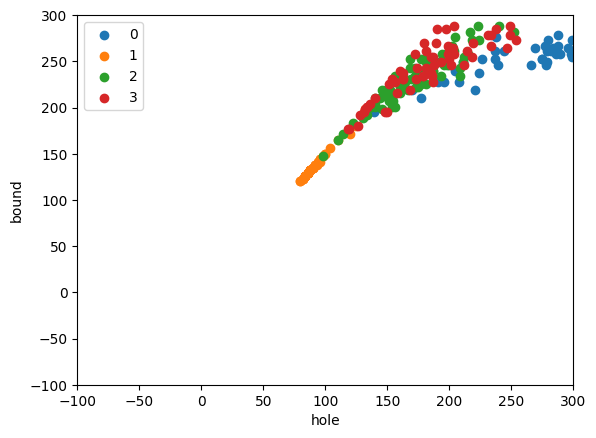

In [150]:
transform=np.array([[1.5,0],[2.0,3.0]])
train_feats_t=np.matmul(train_feats,transform)
test_feats_t=np.matmul(test_feats,transform)
print(transform)
fig,ax=plotData(train_feats_t,train_Y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
test_pred=NN(train_feats_t,train_Y,test_feats_t)
acc=Accuracy(test_Y,test_pred)
print('Accuracy after transform = ', acc)

[[1. 0.]
 [0. 2.]]
Accuracy after transform =  0.8095238095238095


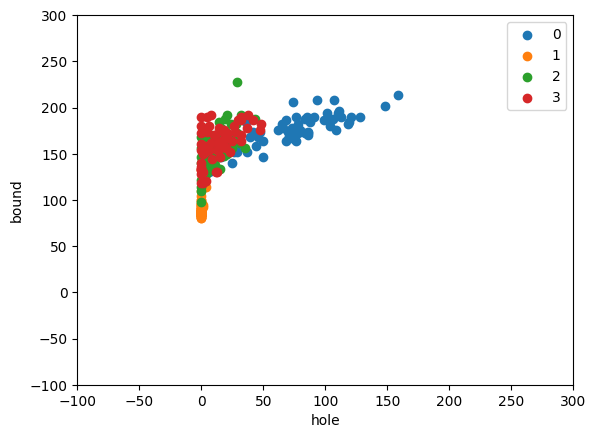

In [151]:
transform=np.array([[1,0],[0,2.0]])
train_feats_t=np.matmul(train_feats,transform)
test_feats_t=np.matmul(test_feats,transform)
print(transform)
fig,ax=plotData(train_feats_t,train_Y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
test_pred=NN(train_feats_t,train_Y,test_feats_t)
acc=Accuracy(test_Y,test_pred)
print('Accuracy after transform = ', acc)

**1. Experiment with different transformation matrices and check the accuracy**

**Ans:**
For any change in matrix values, the accuracy remains highest at 0.8095238095238095.

**2. Will the same transform used for these two features also work for other features?**

**Ans:**
The same transform that was used for these two features might not work for new features unless they have a similar linear relationship to the original ones. The feature transformation should be selected based on the data's specific properties and the relationships between features.


In [152]:
def rescale(data):
  return (data-data.min())/(data.max()-data.min())

In [153]:
train_feats_rescaled_x=rescale(train_feats[:,0])
train_feats_rescaled_y=rescale(train_feats[:,1])
train_feats_rescaled=np.stack((train_feats_rescaled_x,train_feats_rescaled_y),1)

test_feats_rescaled_x=rescale(test_feats[:,0])
test_feats_rescaled_y=rescale(test_feats[:,1])
test_feats_rescaled=np.stack((test_feats_rescaled_x,test_feats_rescaled_y),1)

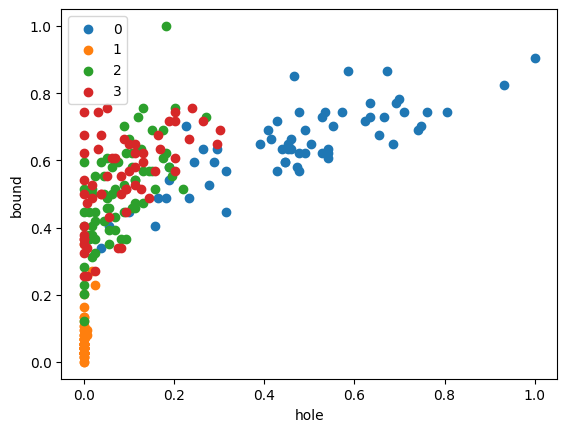

In [155]:
fig,ax=plotData(train_feats_rescaled,train_Y)

In [156]:
test_pred=NN(train_feats_rescaled,train_Y,test_feats_rescaled)
acc=Accuracy(test_Y,test_pred)
print('Accuracy after transform = ',acc)

Accuracy after transform =  0.8095238095238095
